경사 계산 기능을 이용한 단순한 선형회귀(경사 하강법)
* 경사 하강법(중요)

데이터 전처리

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# 샘플 데이터 선언
sample_data = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])
print(sample_data)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [3]:
#머신러닝 모델에서의 사용을 위해, 신장을 변수x로, 체중을 변수y로 함
x = sample_data[:,0]
y = sample_data[:,1]

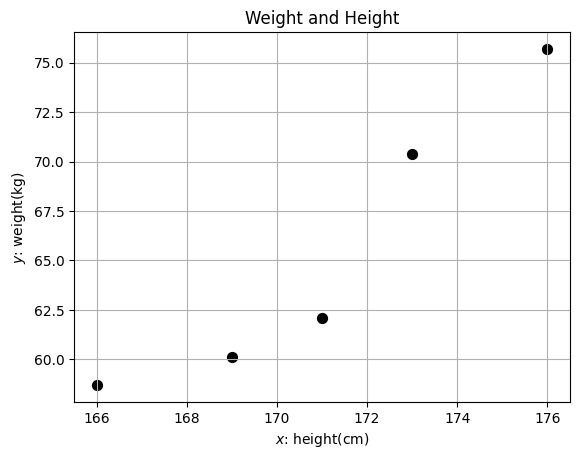

In [4]:
#산포도 출력
plt.scatter(x, y, c = 'k', s=50)
plt.xlabel('$x$: height(cm)')
plt.ylabel('$y$: weight(kg)')
plt.title('Weight and Height')
plt.grid()
plt.show()

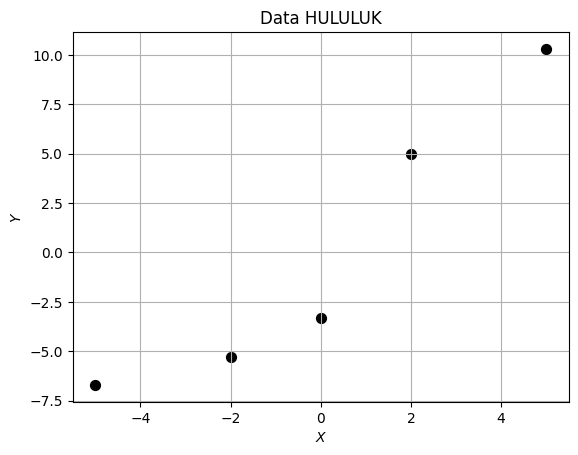

In [5]:
# 경사하강법의 대상이 될 값은 절댓값이 1을 넘지 않는 비교적 작은 값이 필요
#따라서 X, Y는 x,y에서 각 평균을 빼서 사용
X = x - x.mean()
Y = y - y.mean()

plt.scatter(X, Y, c = 'k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Data HULULUK')
plt.grid()
plt.show()

예측 계산

In [6]:
#X, Y를 텐서 변수로 변환
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [7]:
# 1차함수의 계수에 해당하는 변수 W와 정수항 B도 텐서 변수로 정의(y = WX + B(선형회귀))\
#W, B는 경사 계산을 위하여 requires_grad = True(초기값은 1.0)
W = torch.tensor(1.0, requires_grad=True).float()
B  = torch.tensor(1.0, requires_grad=True).float()

In [8]:
#예측 함수
def pred(X):
    return W*X + B

Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


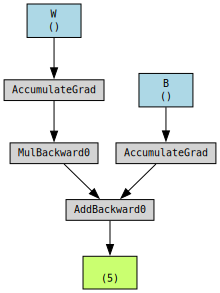

In [9]:
#예측값 Yp의 계산 그래프
from torchviz import make_dot
params = {'W':W, 'B':B}
g = make_dot(Yp, params=params)
display(g)

손실계산

In [10]:
#손실함수 정의(MSE)
def mse(Yp, Y):
    loss = ((Yp-Y)**2).mean()
    return loss

In [11]:
loss = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


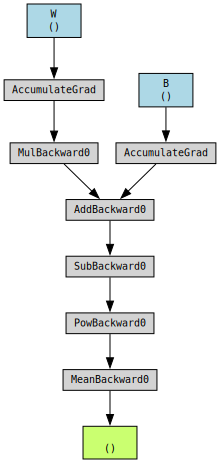

'\n손실: 예측 함수와 손실 함수의 합성 함수\n--> 예측 함수의 거동을 결정 짓는 파라미터(W, B)의 함수\n'

In [12]:
#위의 과정에서 얻은 loss는 1차 함수의 계수인 W와 정수항 B일 것.
#손실 계산 그래프 출력
params = {'W':W, 'B':B}
g = make_dot(loss, params=params)
display(g)
"""
손실: 예측 함수와 손실 함수의 합성 함수
--> 예측 함수의 거동을 결정 짓는 파라미터(W, B)의 함수
"""

경사 계산

In [13]:
#경사 계산
loss.backward()

In [14]:
#확인
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


파라미터 수정

In [15]:
#학습률 정의
lr = 0.001

#경사를 기반으로 파라미터 수정
#이렇게 하면 에러남(경사 계산 도중의 변수(W, B)는 외부에 영향을 끼치므로 값 변경 X)
# W -= lr * W.grad
# B -= lr * W.grad

#with torch.no_grad()를 사용하여 파라미터 수정
with torch.no_grad():#일시적으로 계산 그래프 생성 기능이 작동 X, 변수 수정 가능
    W -= lr * W.grad
    B -= lr * B.grad

    #계산이끝난 경사값 초기화
    W.grad.zero_()
    B.grad.zero_()

In [16]:
#파라미터와 경사값 확인
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


반복 계산(지금까지 한거 실전ver)

In [17]:
#반복 계산의 초기화 처리
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epoch = 500

lr = 0.001

history = np.zeros((0, 2))

In [18]:
#루프 처리 구현

for epoch in range(num_epoch):
    #예측 계산
    Yp = pred(X)

    #손실 계산
    loss = mse(Yp, Y)

    #경사 계산
    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

        W.grad.zero_()
        B.grad.zero_()

    
    #손실 기록
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item)) #vstack --> 수직으로 행렬 결합
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

결과평가

In [19]:
#최종 파라미터 값
print('W =', W.data.numpy())
print('B = ',B.data.numpy())
#손실 확인
print(f'초기 상태: 손실 :{history[0,1] : .4f}')
print(f'최종 상태: 손실 :{history[-1,1] : .4f}')

W = 1.820683
B =  0.3675114
초기 상태: 손실 : 13.3520
최종 상태: 손실 : 4.6796


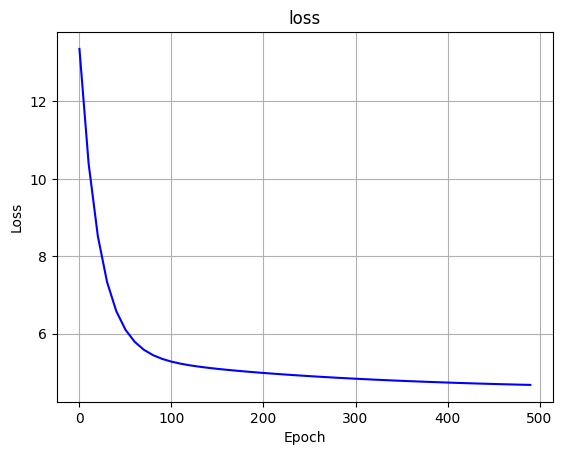

In [20]:
#학습 곡선 출력
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('loss')
plt.grid()
plt.show()

최적화 함수와 Step 함수 이용

In [21]:
#최적화 함수를 이용한 초기화 처리

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epoch = 500

lr = 0.001

#optimizer로 SGD(확률적 경사 하강법) 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

#history기록
history = np.zeros((0, 2))
#print(history)

In [22]:
#최적화 함수를 이용한 반복 계산
for epoch in range(num_epoch):
    Yp = pred(X)

    loss = mse(Yp, Y)

    loss.backward()

    #파라미터 수정
    optimizer.step()

    #경사값 초기화
    optimizer.zero_grad()

    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [23]:
#최적화 함수를 적용했을 때 최종 결과
print('W = ', W.data.numpy())
print('B = ',B.data.numpy())

print(f'초기 상태: 손실 : {history[0, 1]:.4f}')
print(f'최종 상태: 손실 : {history[-1, 1]:.4f}')

W =  1.820683
B =  0.3675114
초기 상태: 손실 : 13.3520
최종 상태: 손실 : 4.6796


In [24]:
#최적화 함수 튜닝
#최적화 함수를 이용한 초기화 처리

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epoch = 500

lr = 0.001

#optimizer로 SGD(확률적 경사 하강법) 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

#history기록
history2 = np.zeros((0, 2))
#print(history)

In [25]:
#최적화 함수를 이용한 반복 계산
for epoch in range(num_epoch):
    Yp = pred(X)

    loss = mse(Yp, Y)

    loss.backward()

    #파라미터 수정
    optimizer.step()

    #경사값 초기화
    optimizer.zero_grad()

    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 5.7585
epoch = 20 loss = 5.9541
epoch = 30 loss = 5.0276
epoch = 40 loss = 4.8578
epoch = 50 loss = 4.7052
epoch = 60 loss = 4.6327
epoch = 70 loss = 4.5940
epoch = 80 loss = 4.5698
epoch = 90 loss = 4.5574
epoch = 100 loss = 4.5495
epoch = 110 loss = 4.5452
epoch = 120 loss = 4.5426
epoch = 130 loss = 4.5411
epoch = 140 loss = 4.5403
epoch = 150 loss = 4.5398
epoch = 160 loss = 4.5395
epoch = 170 loss = 4.5393
epoch = 180 loss = 4.5392
epoch = 190 loss = 4.5391
epoch = 200 loss = 4.5391
epoch = 210 loss = 4.5391
epoch = 220 loss = 4.5391
epoch = 230 loss = 4.5390
epoch = 240 loss = 4.5390
epoch = 250 loss = 4.5390
epoch = 260 loss = 4.5390
epoch = 270 loss = 4.5390
epoch = 280 loss = 4.5390
epoch = 290 loss = 4.5390
epoch = 300 loss = 4.5390
epoch = 310 loss = 4.5390
epoch = 320 loss = 4.5390
epoch = 330 loss = 4.5390
epoch = 340 loss = 4.5390
epoch = 350 loss = 4.5390
epoch = 360 loss = 4.5390
epoch = 370 loss = 4.5390
epoch = 380 loss = 4.5

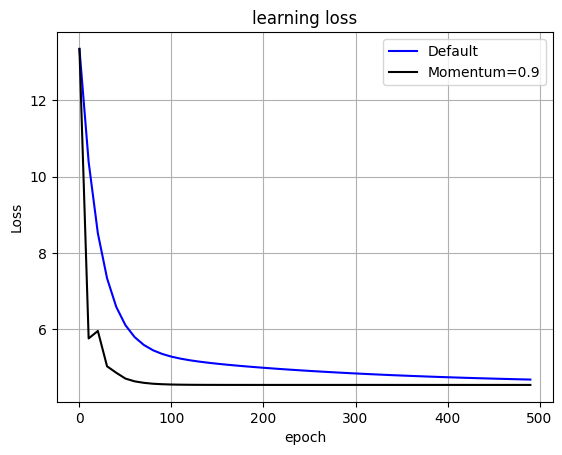

In [26]:
plt.plot(history[:, 0], history[:, 1], c='b', label='Default')
plt.plot(history2[:,0], history2[:, 1], c='k', label='Momentum=0.9')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.title('learning loss')
plt.show()

#### 산포도에 회귀 직선을 동시에 출력

In [27]:
# x의 범위를 구함(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-9.1034,  9.1035])


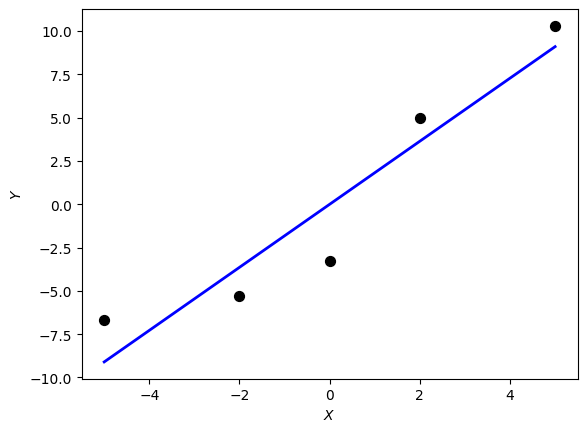

In [28]:
# 그래프 출력

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.show()